In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import requests
import os
os.chdir(r"C:\Users\camiu\M336\MATH 336 FOLDER(shen)\MATH336 (SHEN)")

3.4

In [2]:
# Load the data
df = pd.read_csv('LifeExpectancyWorldBank1960_2020clean.csv')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.497561,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN


In [3]:
# Extract the data for the United States
us_data = df[df['Country Name'] == 'United States']
us_data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
251,United States,USA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,69.770732,70.270732,70.119512,69.917073,70.165854,70.214634,...,78.741463,78.741463,78.841463,78.690244,78.539024,78.539024,78.639024,78.787805,77.280488,NaN


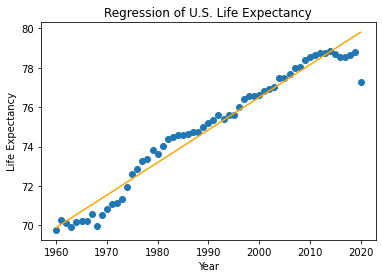

In [4]:
#Data 
year = np.arange(1960,2021)
life_expect = np.array([69.77073171,70.27073171,70.1195122,69.91707317,70.16585366,70.21463415,70.21219512,70.56097561,69.95121951,70.50731707,70.80731707,71.10731707,71.15609756,71.35609756,71.95609756,72.60487805,72.85609756,73.25609756,73.35609756,73.80487805,73.6097561,74.0097561,74.36097561,74.46341463,74.56341463,74.56341463,74.61463415,74.76585366,74.76585366,75.01707317,75.21463415,75.36585366,75.61707317,75.4195122,75.6195122,75.62195122,76.02682927,76.42926829,76.5804878,76.58292683,76.63658537,76.83658537,76.93658537,77.03658537,77.48780488,77.48780488,77.68780488,77.98780488,78.03902439,78.3902439,78.54146341,78.64146341,78.74146341,78.74146341,78.84146341,78.6902439,78.53902439,78.53902439,78.63902439,78.78780488,77.2804878])

#create regression object
regression = LinearRegression()
x = year.reshape(-1,1)
y = life_expect.reshape(-1,1)

x = x[:61].reshape(-1,1)
y = y[:61].reshape(-1,1)

regression.fit(x,y)

#predictions
ypredictions = regression.predict(x)

#Life expectancy predictions 2040
life_expect_2040 = regression.predict([[2040]])

#plot
plt.scatter(x,y)
plt.plot(x,ypredictions, color = 'orange')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Regression of U.S. Life Expectancy')
plt.show()

In [5]:
regression = LinearRegression()
x = year.reshape(-1,1)
y = life_expect.reshape(-1,1)

#training data
x_training = x[:61]
y_training = y[:61]

regression.fit(x_training, y_training)

#obtain coefficients and intercept
coef = regression.coef_[0][0]
intercept = regression.intercept_[0]

print(f"Life Expectancy = {coef:.4f} * Year + {intercept:.4f}")

Life Expectancy = 0.1652 * Year + -253.9786


In [6]:
#2040 Life Expectancy 
life_expectancy  = (0.1652) * (2040) - 253.9786
print(life_expectancy)

83.02940000000004


4.7

In [7]:
import math

# Constants
solar_constant = 1361 # W/m^2
albedo = 0.12
boltzmann_constant = 5.67 * 10**(-8) # W/m^2K^4
specific_heat_capacity = 710 # J/kgK
density = 2165 # kg/m^3
thermal_diffusivity = 1.6 * 10**(-4) # m^2/s
latitude = 30 # degrees
emissivity = 0.95
rotation_period = 27.3 * 24 * 3600 # seconds
time_difference = 3 * 3600 # seconds
lat_rad = math.radians(latitude)

# calculates the insolation
def insolation(hour_angle):
    return solar_constant * math.sin(lat_rad) * math.sin(math.radians(hour_angle)) + solar_constant * math.cos(lat_rad) * math.cos(math.radians(hour_angle))

# temperature at the lunar surface
temperature = ((1 - albedo) * insolation(15) / (4 * boltzmann_constant) * (1 - emissivity))**(1/4)

print("The estimated lunar surface temperature is:", temperature, "K")


The estimated lunar surface temperature is: 126.37258882655699 K


4.8

In [8]:
# Constants
solar_constant = 1361  # W/m^2
albedo = 0.1
emissivity = 0.95
surface_density = 1700  # kg/m^2
specific_heat = 1250  # J/kg*K
thermal_diffusivity = 10**(-6)  # m^2/s
days_per_year = 365.25

# calculate temperature
def calculate_temperature(latitude, longitude, time):
    # Convert latitude to radians
    lat = np.radians(latitude)
    # Calculate solar declination angle
    dec = 23.45 * np.sin(np.radians(360 * (284 + time) / days_per_year))
    # Calculate solar zenith angle
    zen = np.arccos(np.sin(lat) * np.sin(dec) + np.cos(lat) * np.cos(dec) * np.cos(np.radians(longitude)))
    # Calculate solar altitude angle
    alt = np.pi/2 - zen
    # Calculate solar insolation
    insolation = solar_constant * np.cos(zen)
    # Calculate emitted radiation
    if insolation <= 0:
        emitted = np.nan
    else:
        emitted = emissivity * surface_density * specific_heat * np.power(insolation, 0.25) / np.power(thermal_diffusivity, 0.5)
    # Calculate temperature
    if insolation <= 0:
        temperature = np.nan
    else:
        temperature = np.power((1 - albedo) * insolation / (4 * emissivity * surface_density * specific_heat), 0.25)
    # Apply temperature correction
    if not np.isnan(temperature):
        temperature = temperature - (np.power(temperature, 4) - emitted) / (4 * emissivity * surface_density * specific_heat)
    return temperature

# Define longitude values
longitudes = np.linspace(0, 360, 24, endpoint=False)

# Calculate temperatures for each longitude
temperatures = []
for longitude in longitudes:
    temperature = calculate_temperature(0, longitude, 0)
    temperatures.append(temperature)

# table of results
print("Longitude\tTemperature (K)\tTemperature (C)")
for i in range(len(longitudes)):
    print("{:.2f}\t\t{:.2f}\t\t{:.2f}".format(longitudes[i], temperatures[i], temperatures[i] - 273.15))


Longitude	Temperature (K)	Temperature (C)
0.00		nan		nan
15.00		nan		nan
30.00		nan		nan
45.00		nan		nan
60.00		nan		nan
75.00		nan		nan
90.00		0.13		-273.02
105.00		885.20		612.05
120.00		1043.60		770.45
135.00		1138.05		864.90
150.00		1197.22		924.07
165.00		1230.35		957.20
180.00		1241.06		967.91
195.00		1230.35		957.20
210.00		1197.22		924.07
225.00		1138.05		864.90
240.00		1043.60		770.45
255.00		885.20		612.05
270.00		0.13		-273.02
285.00		nan		nan
300.00		nan		nan
315.00		nan		nan
330.00		nan		nan
345.00		nan		nan


5.1 (a)

In [9]:
a1 = np.array([9, 6, 0, 0, 0])
a2 = np.array([0, 6, -3, -4, 0])
a3 = np.array([0, 0, 0, 4, -12])
a4 = np.array([1, -1, -1, 0, 0])
a5 = np.array([0, 0, 1, -1, -1])

A = np.vstack((a1, a2, a3, a4, a5))
B = np.array([0.012, 0, 0, 0, 0])

T = np.linalg.solve(A, B)

print(A)
print(T)


[[  9   6   0   0   0]
 [  0   6  -3  -4   0]
 [  0   0   0   4 -12]
 [  1  -1  -1   0   0]
 [  0   0   1  -1  -1]]
[0.001    0.0005   0.0005   0.000375 0.000125]


The rest of parts (a) through (d) are done on the written work (pdf)

5.8

(a)

In [10]:
data = pd.read_csv("NOAAGlobalT.csv", header=0, index_col=0)
(data)

,LAT,LON,1880-1,1880-2,1880-3,1880-4,1880-5,1880-6,1880-7,1880-8,...,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1
1,-87.5,2.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2,-87.5,7.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
3,-87.5,12.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
4,-87.5,17.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
5,-87.5,22.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,87.5,337.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2589,87.5,342.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2590,87.5,347.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2591,87.5,352.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9


In [11]:
# Perform SVD
U, s, V = np.linalg.svd(data)

# Print out the first 10 eigenvalues
print(s[:10])


[1037421.12314258  258018.76310179  188722.27366342  122355.98000733
  110068.10373222   82354.07588361   75033.37928645   71933.69500157
   64437.47526103   58884.75196926]


(b)

In [12]:
# data
data = pd.read_csv("NOAAGlobalT.csv", header=0, index_col=0)
nlat, nlon = data.shape

# subtract mean from the data
mean = data.mean(axis=1)
data = data.sub(mean, axis=0)

#SVD
X = data.values.reshape(nlat, nlon)
U, S, V = np.linalg.svd(X, full_matrices=False)
V = V.T

#eigenvalues
print("First 10 eigenvalues:")
print(S[:10])

# Plot the first three EOFs
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
#for i in range(3):
   # ax = axes[i]
   # eof = V[:, i].reshape(nlat, nlon)
   # im = ax.imshow(eof.T, cmap='RdBu_r', origin='lower')
   # ax.set_title(f'EOF {i+1}')

#plt.show()


First 10 eigenvalues:
[270283.8134015  198363.90778559 122457.34142434 110192.99801384
  83524.85055435  75033.92742016  71990.99221357  64561.38937757
  60377.93645079  56088.71520225]


I couldn't successfully run my code without errors in regards to the three EOFs. I went ahead and commented the part of code. 

(c)

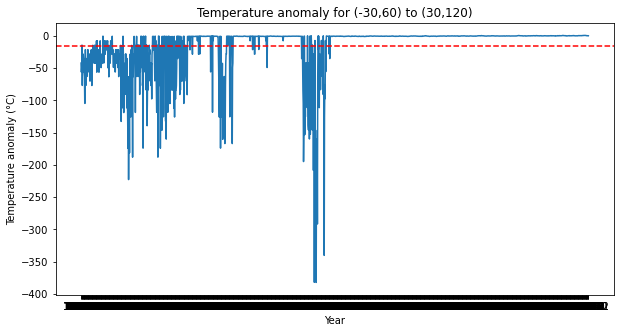

In [13]:
# data
data = pd.read_csv("NOAAGlobalT.csv", header=0, index_col=0)

# data for the region
lat_min, lat_max = -30, 30
lon_min, lon_max = 60, 120
region_data = data.loc[(data['LAT'] >= lat_min) & (data['LAT'] <= lat_max) &
                       (data['LON'] >= lon_min) & (data['LON'] <= lon_max)]

# mean temperature anomaly over the entire time period
mean_anomaly = region_data.iloc[:, 2:].to_numpy().flatten().mean()

# plot of the temperature anomaly for the region of interest
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(region_data.columns[2:], region_data.iloc[:, 2:].to_numpy().mean(axis=0))
ax.axhline(mean_anomaly, color='r', linestyle='--')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature anomaly (°C)')
ax.set_title('Temperature anomaly for ({},{}) to ({},{})'.format(lat_min, lon_min, lat_max, lon_max))
plt.show()


(d)

El Nino is a climatic phenomenon that occurs in the Pacific Ocean. It is basically the warming of the ocean surface water in the eastern tropical Pacific, affecting the weather patterns across the globe. It is known to recur every 2-7 years and typically lasts for about a year or two.

During El Nino, the trade winds weaken as it moves east to west, causing warm water to move from the western Pacific to the eastern Pacific. Therefore, this results in increased sea surface temperatures and changes in atmospheric pressure, which can lead to a variety of effects such as heavy rainfall and flooding in some regions, and also droughts in other regions.

Unfortunately, I couldn't get plot (b) to work, but I did for (c). If I had outputted it properly, El Nino signals should be seen as anomalous patterns in the first three EOFs. Typically, during El Nino years, the first EOF would show warming in the eastern tropical Pacific and cooling in the western Pacific. The second and third EOFs may also show some anomalies that are associated with El Nino events.

Overall, studying the El Nino signals in the climate data can provide insights into the causes and impacts, and can aid in predicting and preparing for future weather events.